<a href="https://colab.research.google.com/github/NataliaOlarte/Ciencia_de_datos/blob/main/Actividad_21_04_titanic_parteEmbarked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bar_char es gráfico de barras


#La ingeniería de las características
Es el proceso de usar el dominio del conocimiento de los datos para crear nuevas características (feature vectors) con el fin de lograr que los algoritmos de machine learning funcionen correctamente.

Feature vectors son vectores de n-dimensiones que representan un objeto. Muchos algoritmos de machine learning requieren una representación numérica de los objetos, ya que tales representaciones facilitan el procesamiento y el análisis estadístico.



##¿Cómo se hundió el titanic?
De acuerdo con lo conocido, por la proa del barco donde estaban las habitaciones de tercera clase.

Conclusión: Pclass es una feature **clave** para el clasificador

In [2]:
from IPython.display import Image
Image(url="https://heraldodemexico.com.mx/u/fotografias/fotosnoticias/2021/4/14/355907.jpg")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/titanic-train-original.csv')

In [6]:
def extract_title(data):
  title=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)
  return title

In [7]:
df["Title"]=extract_title(df)

In [8]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


##2.1 Creando un mapeo de los títulos
Reemplazamos lo títulos encontrados por los siguientes valores:
* Mr: 0
* Miss: 1
* Mrs: 2
* Otros: 3

In [9]:
def replace_titles(data):
  title_mapping = {"Mr":0,"Miss":1,"Mrs":2}
  data["Title"] = data["Title"].map(title_mapping).fillna(3) #Si no es ninguno regresar 3
  return data

In [10]:
df=replace_titles(df)
df[["Name","Title"]].head()

,Name,Title
0,"Braund, Mr. Owen Harris",0.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2.0
2,"Heikkinen, Miss. Laina",1.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2.0
4,"Allen, Mr. William Henry",0.0


In [33]:
def bar_char(feature):
  survived=df[df["Survived"]==1][feature].value_counts()
  dead=df[df["Survived"]==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=["Sobrevivientes","Fallecidos"]
  test.plot(kind="bar",stacked=True,figsize=(10,5))
  sns.set_palette(cl)

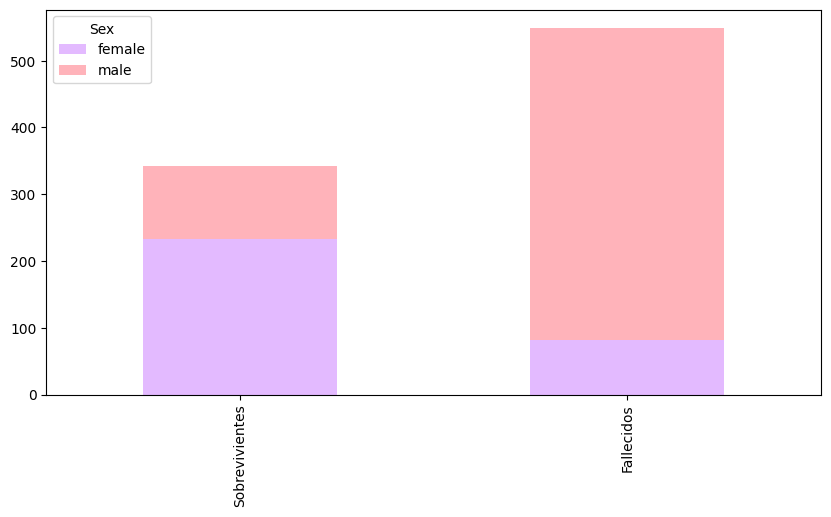

In [60]:
bar_char("Sex")

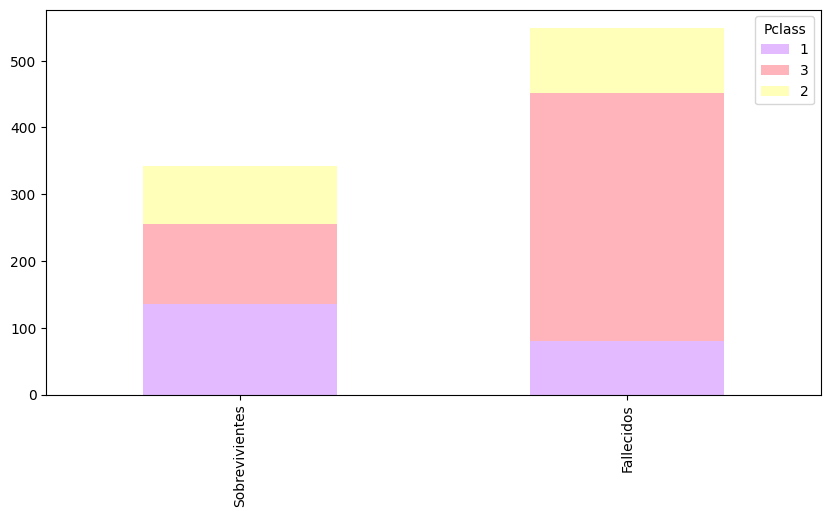

In [59]:
bar_char("Pclass")

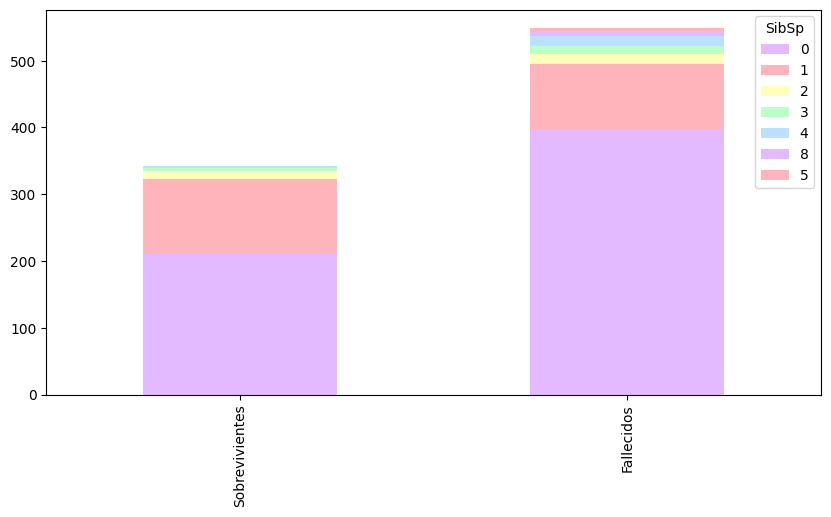

In [57]:
bar_char("SibSp")

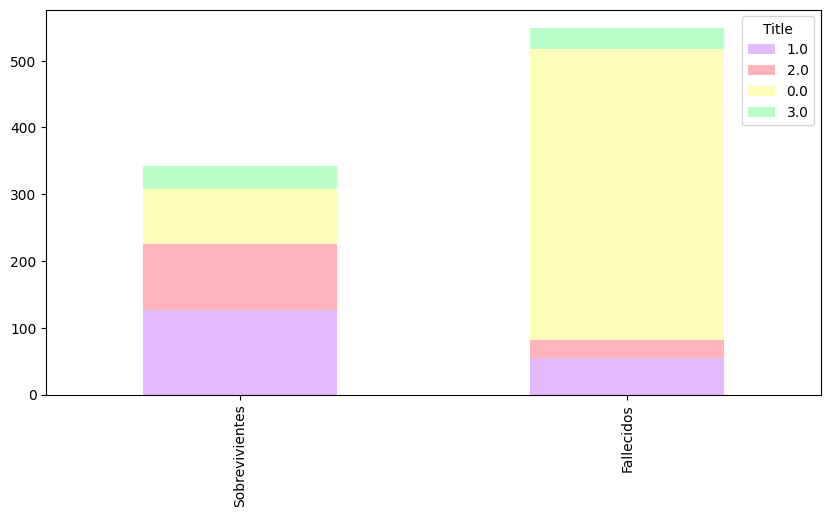

In [56]:
bar_char("Title")

Se observa que las Mss tenían mayores probabilidades de sobrevivir, mientras que los señores la menor probabilidad de sobrevivir

##2.4 Edad
###2.4.1 Rellenar los NaN en edades
Estrategia: Se calcula la media de los títulos y se reemplaza por las edades faltantes

In [17]:
title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
0.0,32.368090
1.0,21.773973
2.0,35.898148
3.0,20.430161


In [18]:
df["Age"]=df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)
#apply es poner sobre, si es nulo q lo rellene y si no q lo deje quieto

In [19]:
df[["Title","Age"]].sample(15)

,Title,Age
399,2.0,28.000000
668,0.0,43.000000
109,1.0,21.773973
104,0.0,37.000000
67,0.0,19.000000
374,1.0,3.000000
211,1.0,35.000000
465,0.0,38.000000
96,0.0,71.000000
341,1.0,24.000000


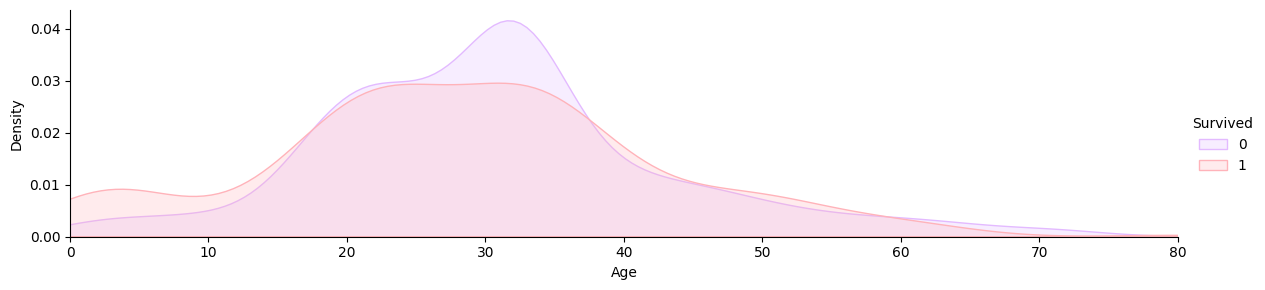

In [55]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

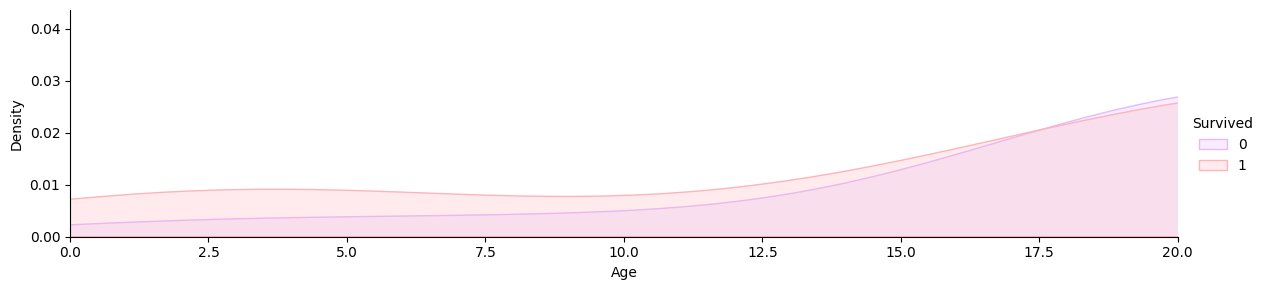

In [54]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(0,20) #para hacerle zoom

(20.0, 30.0)

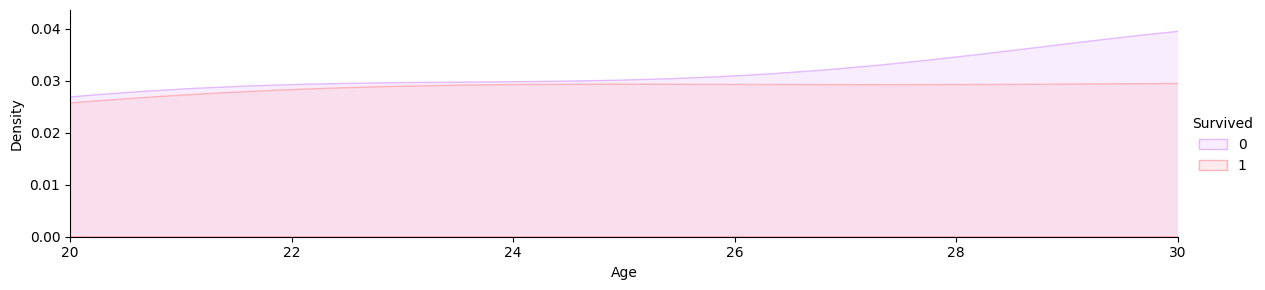

In [53]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(20,30) #para hacerle zoom

(30.0, 40.0)

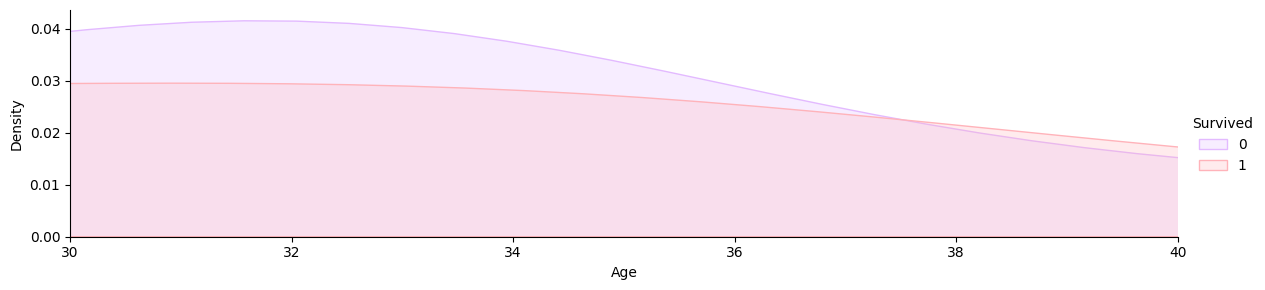

In [52]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(30,40) #para hacerle zoom

(40.0, 60.0)

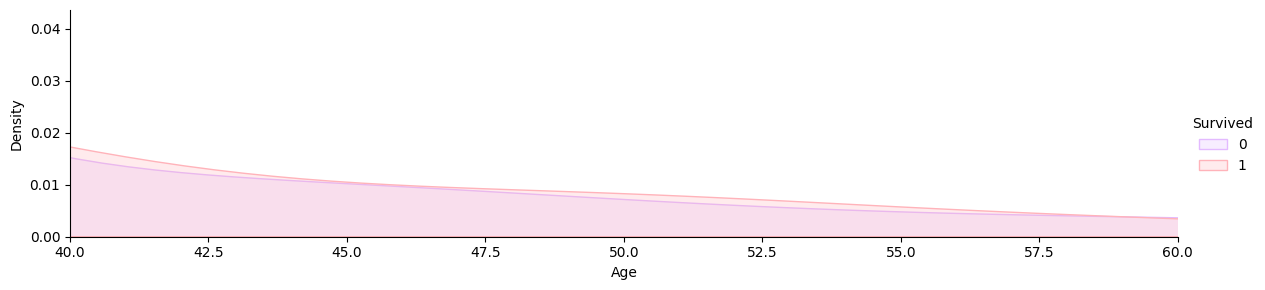

In [51]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(40,60) #para hacerle zoom

(60.0, 80.0)

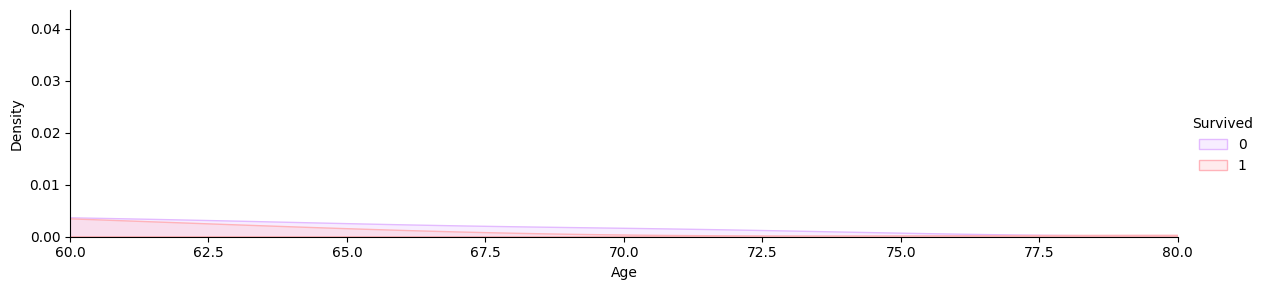

In [50]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(60) #para hacerle zoom

## 2.4.2 Bining
Es convertit una variable numérica a categórica, en este caso, la edad
* niño: 0
* joven: 1
* adulto: 2
* edad madura: 3
* edad avanzada: 4

In [26]:
df["Age_Category"]=pd.cut(df["Age"], bins=[0,16,26,36,62, float("inf")], labels=[0,1,2,3,4],right=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,2


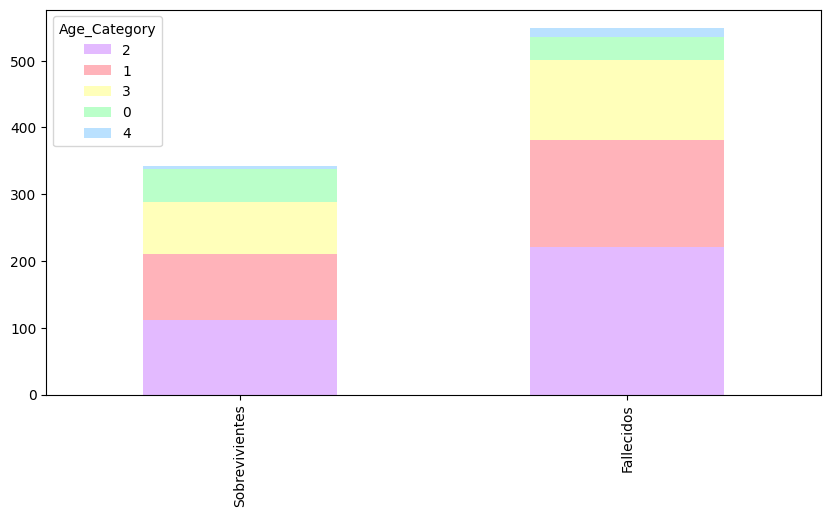

In [49]:
bar_char("Age_Category")

Se observa como había mayores probabilidades de sobrevivir para los niños

## Análisis a Fare

Al no encontrar datos nulos en dicha variable, se procede a hacer un bining, convirtiendo las variables en categóricas

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
cl= ['#E3BAFF', #lila pastel
     '#FFB3BA',  # rosa suave
                 '#FFFFBA',  # amarillo pastel
                 '#BAFFC9',  # verde menta
                 '#BAE1FF',  # celeste claro
                 ]


In [29]:
Max_Fare=df["Fare"].max()
Min_Fare=df["Fare"].min()
print("Máximo Fare:", Max_Fare)
print("Máximo Fare:", Min_Fare)

mediana_fare = df["Fare"].median()
print("Mediana de Fare:", mediana_fare)

Máximo Fare: 512.3292
Máximo Fare: 0.0
Mediana de Fare: 14.4542


In [30]:
df["Fare_Category"]=pd.cut(df["Fare"], bins=[0,5,14,50,300, float("inf")], labels=[0,1,2,3,4],right=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,2,1


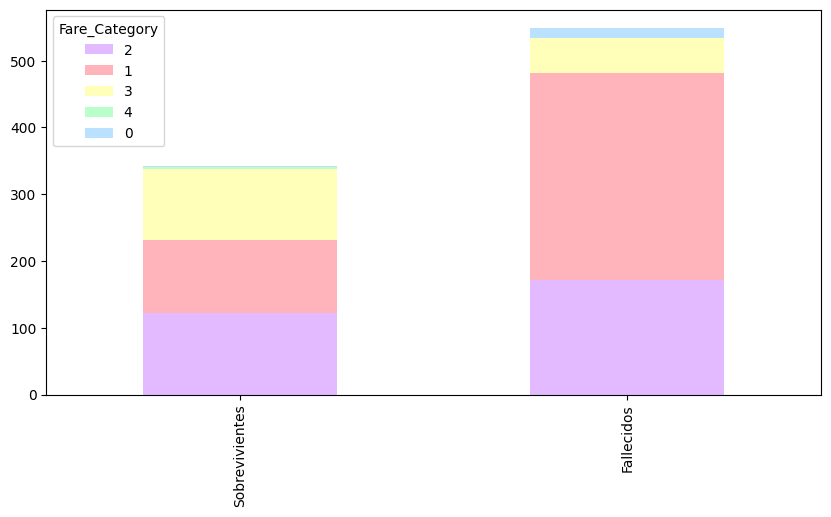

In [48]:
bar_char("Fare_Category")

Se puede concluir que los pasajeros que pagaron una menor cantidad de dinero, no tenían probabilidades de sobrevivir, mientras que todos los que pagaron más de 300, sobrevivieron.
En general se analiza que mientras más pagaran, mayores eran las posibilidades de sobrevivir.

## Análisis a Embarked

In [32]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Se observan 2 datos nulos para Embarked, por lo que hay se busca la manera de llenarlos, para eso miramos cuáles son esas dos filas que los contienen

In [37]:
Embarked_nul = df[df['Embarked'].isnull()]
print(Embarked_nul)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Title  \
61   female  38.0      0      0  113572  80.0   B28      NaN    1.0   
829  female  62.0      0      0  113572  80.0   B28      NaN    2.0   

    Age_Category Fare_Category  
61             3             3  
829            4             3  


In [38]:
print(df['Embarked'].value_counts())
#vemos que tan frecuente es cada valor

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [40]:
cabin_b = df[df['Cabin'].str.startswith('B', na=False)]
print(cabin_b)

     PassengerId  Survived  Pclass  \
31            32         1       1   
54            55         0       1   
61            62         1       1   
118          119         0       1   
139          140         0       1   
170          171         0       1   
194          195         1       1   
195          196         1       1   
257          258         1       1   
263          264         0       1   
291          292         1       1   
299          300         1       1   
311          312         1       1   
329          330         1       1   
369          370         1       1   
390          391         1       1   
435          436         1       1   
484          485         1       1   
487          488         0       1   
504          505         1       1   
520          521         1       1   
523          524         1       1   
536          537         0       1   
539          540         1       1   
540          541         1       1   
587         

No se observa algún patrón aparente entre las cabinas y las puertas de embarque, aunque es evidente que la mayoría de pasajeros con dichas características pertenecen al embarked C, por tanto se opta por reemplazar los valores nulos por "C".

In [41]:
df['Embarked'].fillna('C', inplace=True)

<ipython-input-41-9d92c4e5a384>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('C', inplace=True)


In [43]:
print(df['Embarked'].isnull().sum())
print(df['Embarked'].value_counts())

0
Embarked
S    644
C    170
Q     77
Name: count, dtype: int64


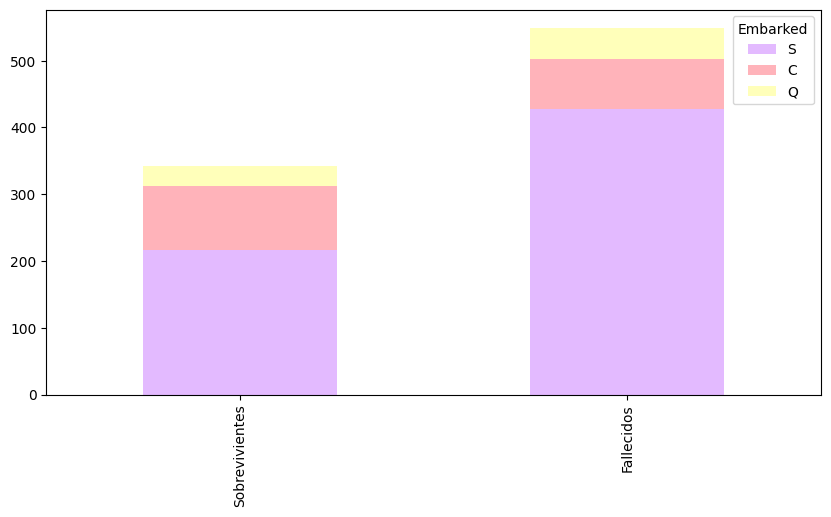

In [47]:
bar_char("Embarked")

Se puede observar que aquellos que usaron el embarked C, tenían mayores probabilidades de sobrevivir, a diferencia de las otras opciones